In [ ]:
from google.colab import drive

drive.mount('/content/drive')
import seaborn as sns

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import matplotlib.dates as dates
import datetime as dt


In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df.drop_duplicates()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

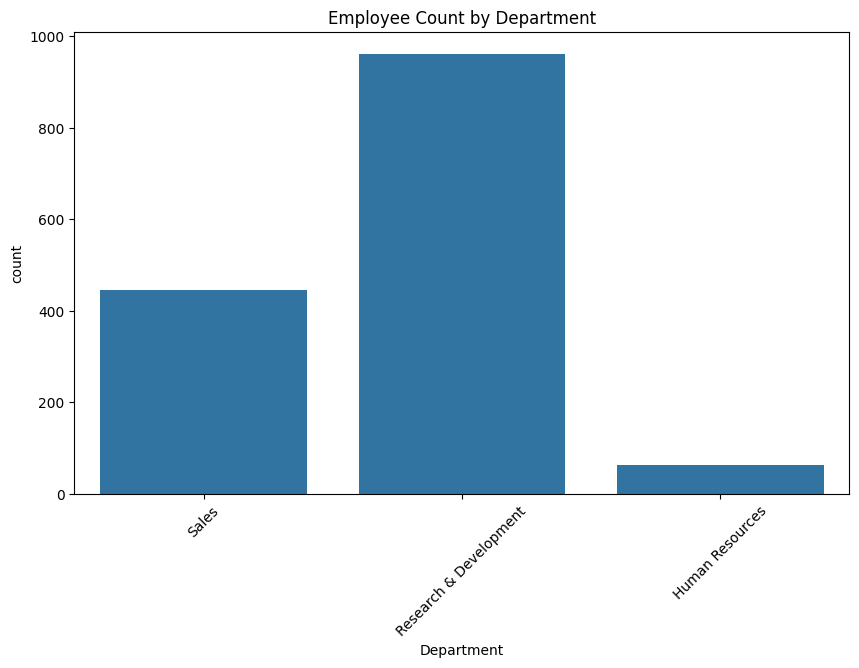

NameError: name 'num_cols' is not defined

<Figure size 1500x1200 with 0 Axes>

In [ ]:
num_cols = df.select_dtypes(include='number').columns.tolist()
# Bivariate Analysis: Department count
sns.countplot(x='Department', data=df)
plt.title('Employee Count by Department')
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap of numerical features
plt.figure(figsize=(15, 12))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['Age'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['DistanceFromHome'], bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distance from Home Distribution')

sns.barplot(x='JobSatisfaction', y='Attrition', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Job Satisfaction vs Attrition')

sns.barplot(x='EnvironmentSatisfaction', y='Attrition', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Environment Satisfaction vs Attrition')

plt.tight_layout()
plt.show()


In [ ]:
# Convert 'Attrition', 'OverTime', and 'Gender' to numerical values for easier analysis
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Creating age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 70], labels=['18-29', '30-39', '40-49', '50-59', '60+'])

# Creating tenure groups
df['TenureGroup'] = pd.cut(df['YearsAtCompany'], bins=[0, 5, 10, 15, 20, 25, 30], labels=['0-4', '5-9', '10-14', '15-19', '20-24', '25+'])

# Creating bins for distance from home
df['DistanceFromHomeGroup'] = pd.cut(df['DistanceFromHome'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40], labels=['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35+'])

# Creating a new feature for overall satisfaction (mean of environment, job, and relationship satisfactions)
df['OverallSatisfaction'] = df[['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction']].mean(axis=1)


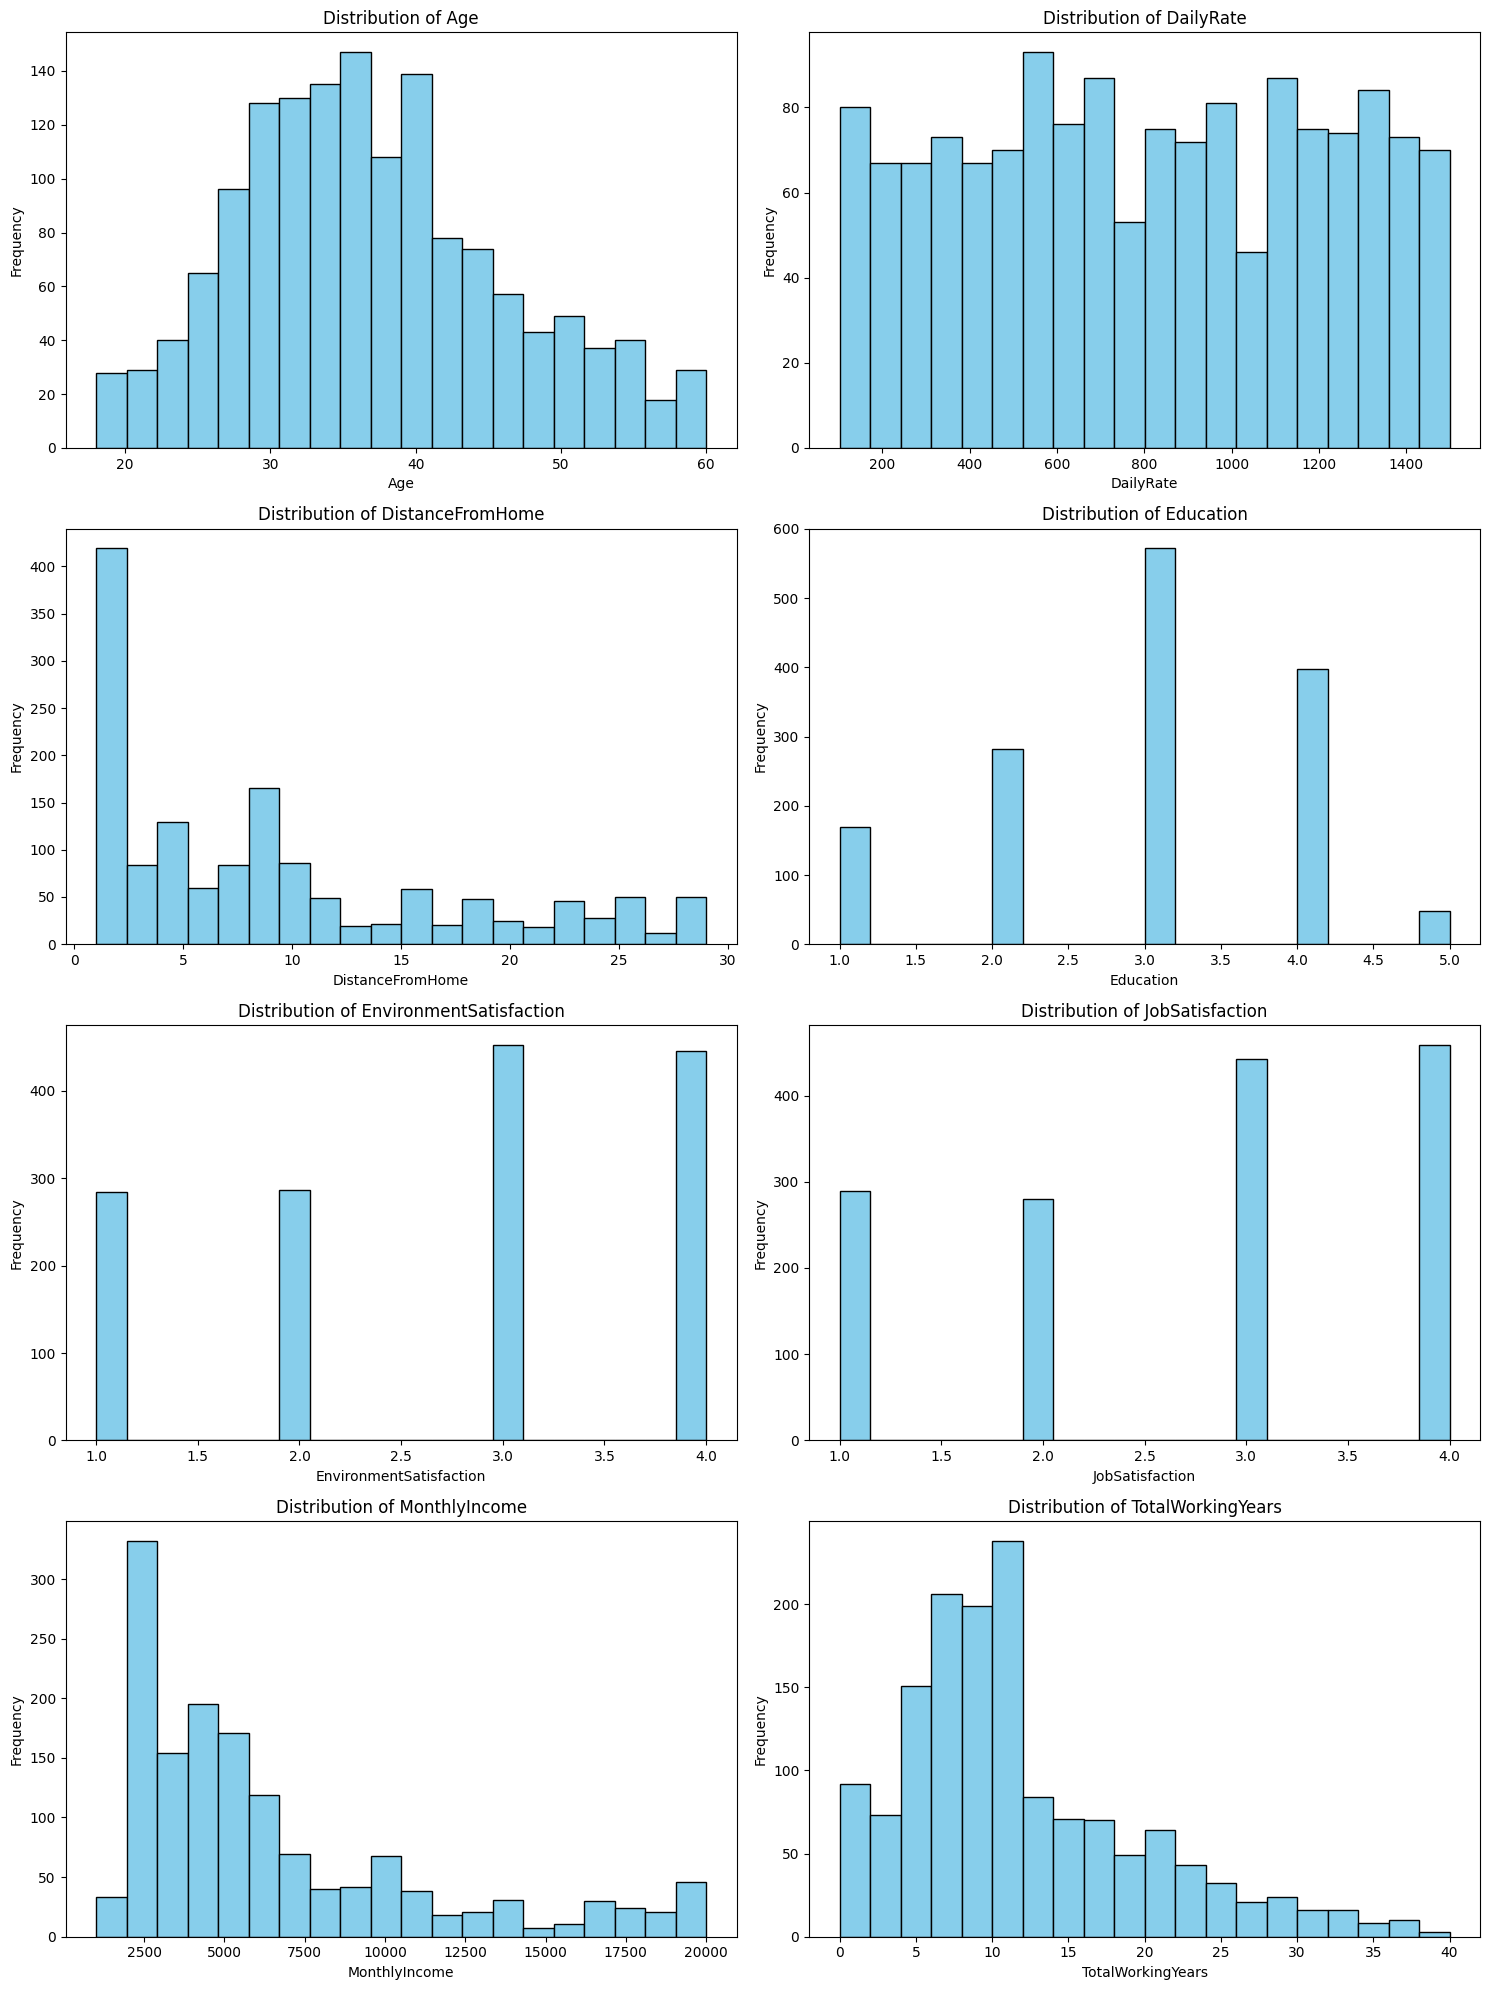

In [ ]:
#Univariate Analysis

import matplotlib.pyplot as plt

# Selecting a subset of columns for univariate analysis to keep it manageable
columns_to_plot = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome', 'TotalWorkingYears']

fig, axes = plt.subplots(len(columns_to_plot) // 2, 2, figsize=(15, 20))

for i, col in enumerate(columns_to_plot):
    row, col_index = i // 2, i % 2
    axes[row, col_index].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[row, col_index].set_title(f'Distribution of {col}')
    axes[row, col_index].set_xlabel(col)
    axes[row, col_index].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


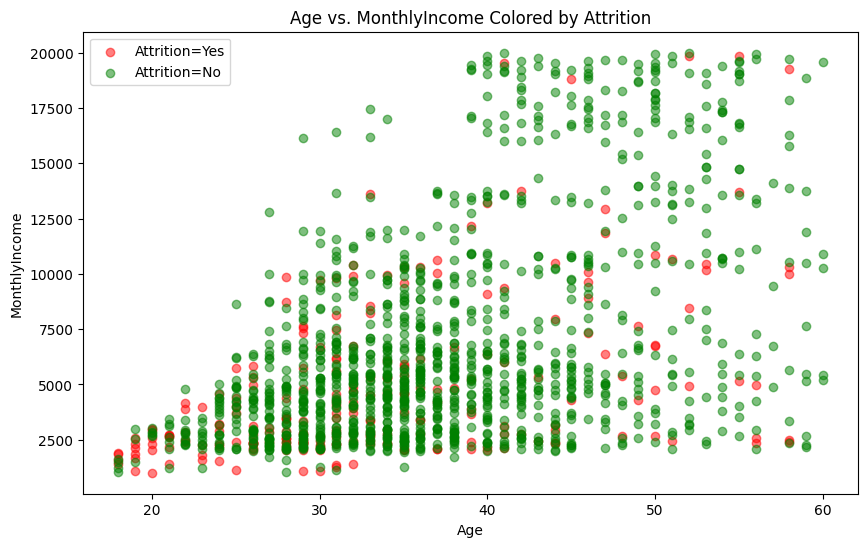

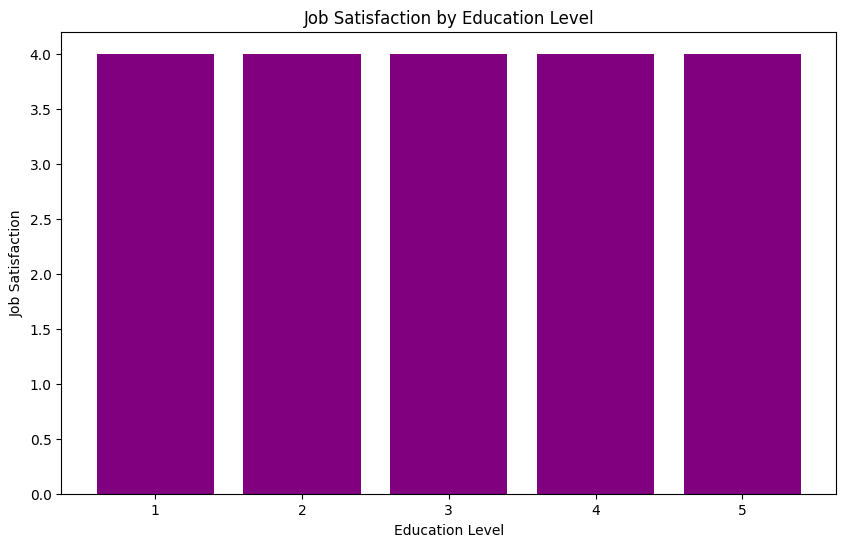

In [ ]:
#Multivariate Analysis

# Scatter plot of Age vs. MonthlyIncome colored by Attrition
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Attrition'] == 1]['Age'], df[df['Attrition'] == 1]['MonthlyIncome'], color='red', label='Attrition=Yes', alpha=0.5)
plt.scatter(df[df['Attrition'] == 0]['Age'], df[df['Attrition'] == 0]['MonthlyIncome'], color='green', label='Attrition=No', alpha=0.5)
plt.title('Age vs. MonthlyIncome Colored by Attrition')
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')
plt.legend()
plt.show()

# Bivariate analysis with Education and JobSatisfaction
plt.figure(figsize=(10, 6))
plt.bar(df['Education'], df['JobSatisfaction'], color='purple', label='Job Satisfaction by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Job Satisfaction')
plt.title('Job Satisfaction by Education Level')
plt.show()


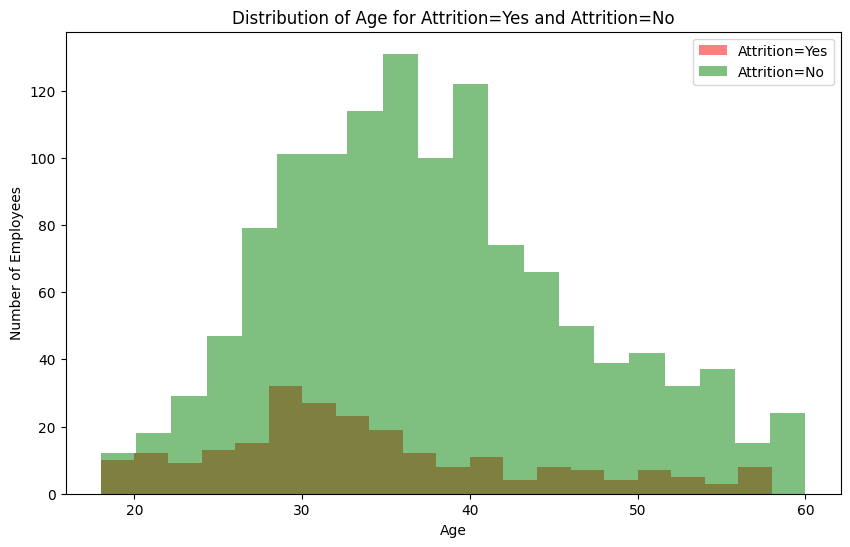

In [ ]:
#Attrition
# Plotting the distribution of Age for those who have left and those who have stayed
plt.figure(figsize=(10, 6))
plt.hist(df[df['Attrition'] == 1]['Age'], bins=20, alpha=0.5, label='Attrition=Yes', color='red')
plt.hist(df[df['Attrition'] == 0]['Age'], bins=20, alpha=0.5, label='Attrition=No', color='green')
plt.title('Distribution of Age for Attrition=Yes and Attrition=No')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()


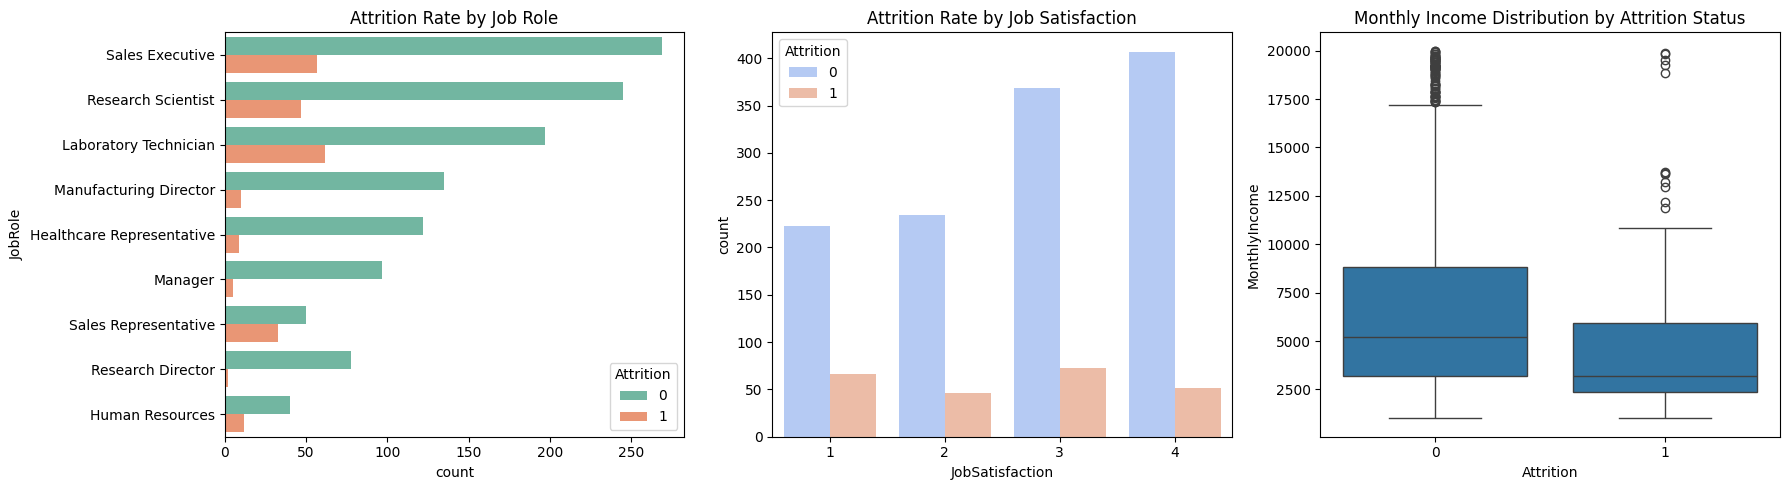

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setup for the plots
plt.figure(figsize=(18, 5))

# Attrition rate by JobRole
plt.subplot(1, 3, 1)
sns.countplot(y='JobRole', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition Rate by Job Role')
plt.tight_layout()

# Attrition rate by JobSatisfaction
plt.subplot(1, 3, 2)
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette='coolwarm')
plt.title('Attrition Rate by Job Satisfaction')
plt.tight_layout()

# Boxplot of MonthlyIncome by Attrition status
plt.subplot(1, 3, 3)
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income Distribution by Attrition Status')
plt.tight_layout()

plt.show()


<ipython-input-19-8dd5eb798de7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


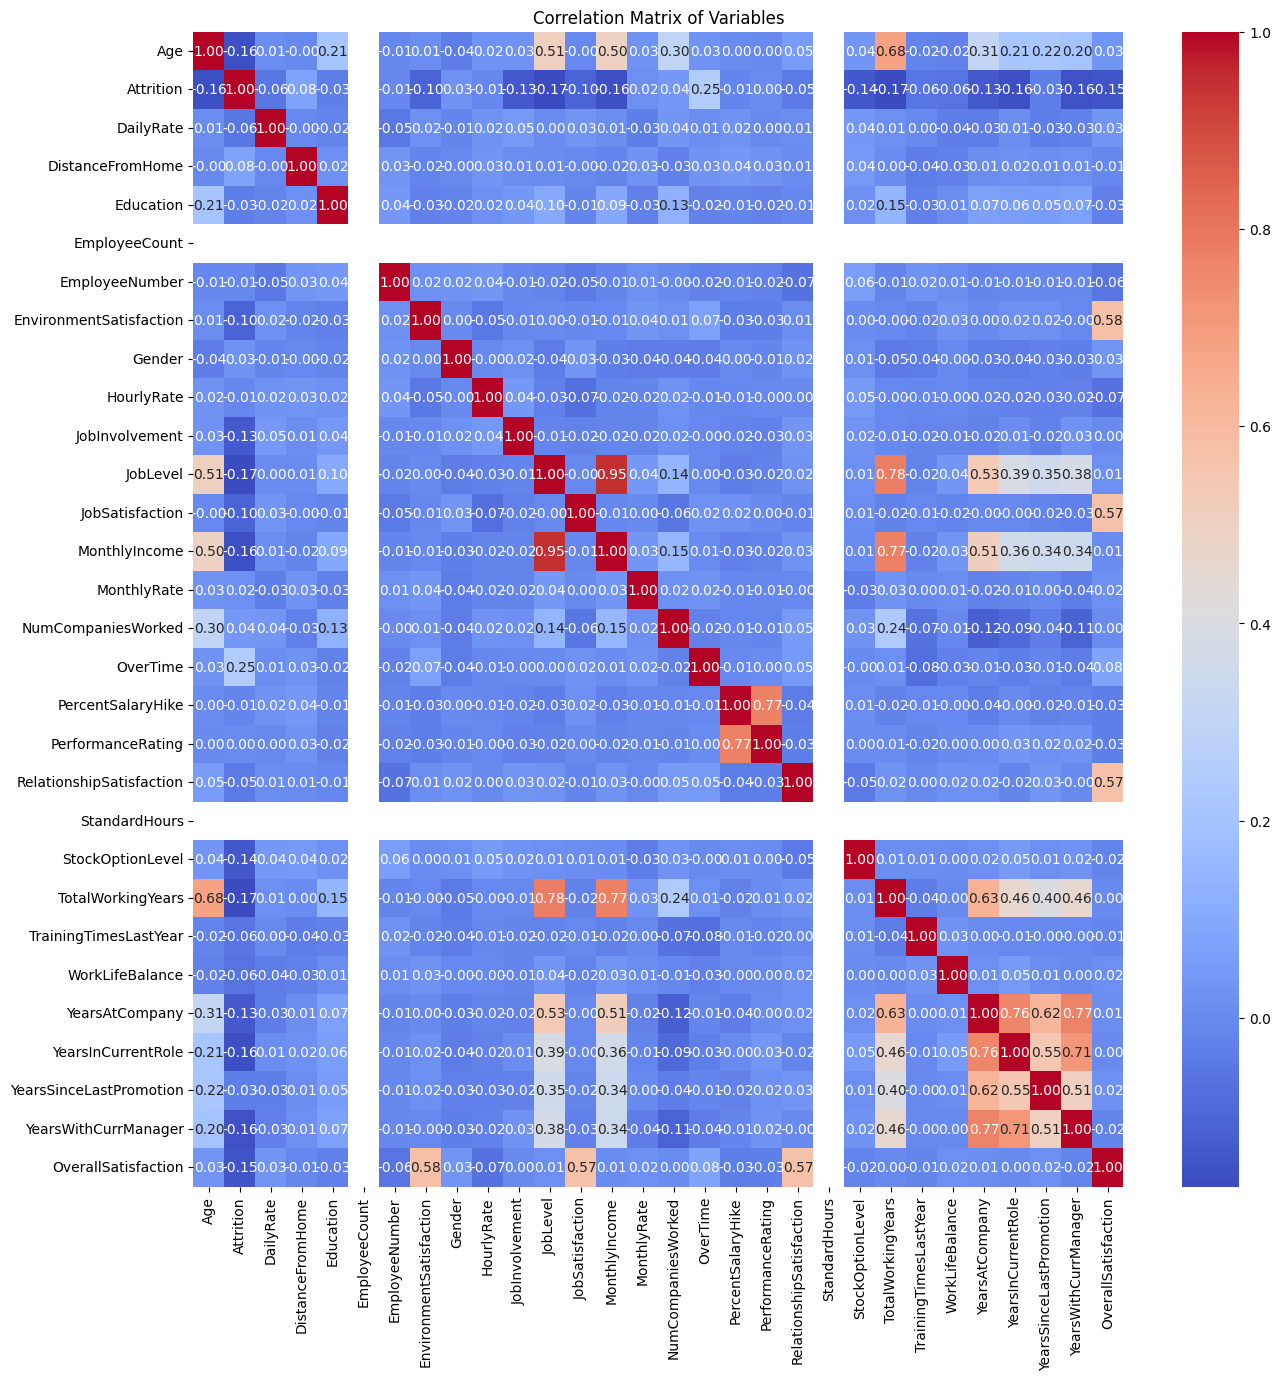

In [ ]:
import seaborn as sns

# Correlation matrix heatmap
corr_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()


<ipython-input-22-8c18aa6eb3e4>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Department', y='MonthlyIncome', data=df, estimator=np.mean, ci=None, palette='viridis')
<ipython-input-22-8c18aa6eb3e4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='MonthlyIncome', data=df, estimator=np.mean, ci=None, palette='viridis')


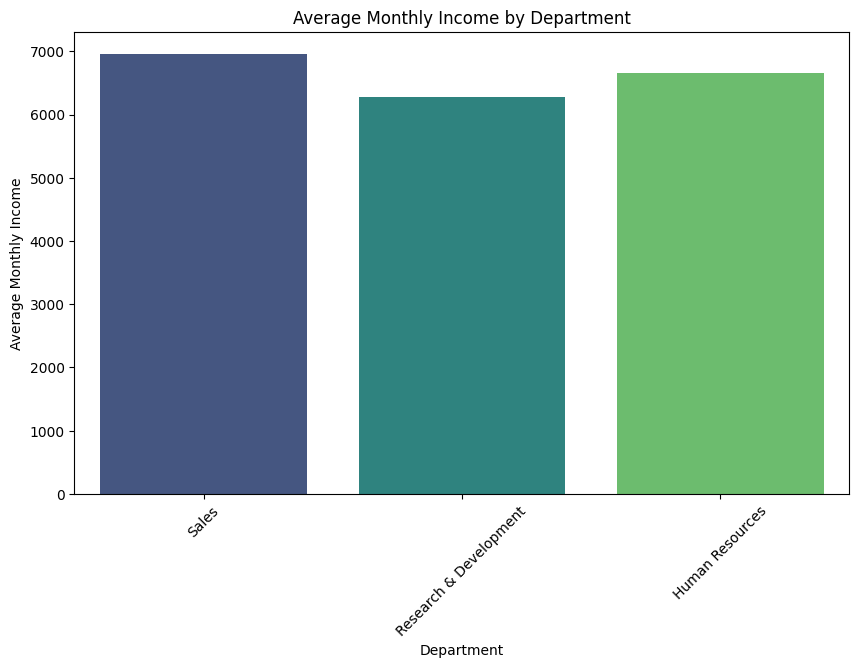

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='MonthlyIncome', data=df, estimator=np.mean, ci=None, palette='viridis')
plt.title('Average Monthly Income by Department')
plt.xticks(rotation=45)
plt.ylabel('Average Monthly Income')
plt.xlabel('Department')
plt.show()


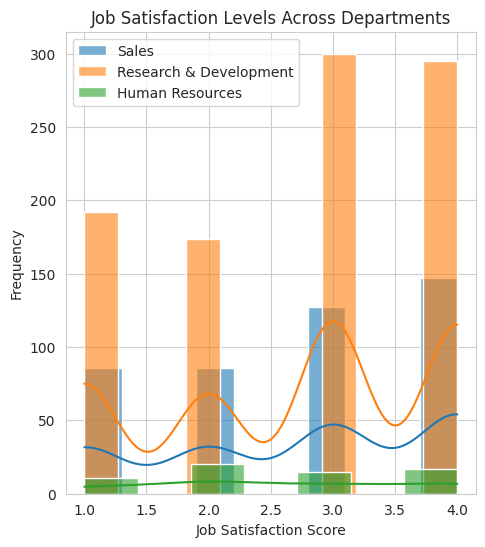

In [ ]:
import seaborn as sns

# Setup for the visualizations
plt.figure(figsize=(18, 6))

# Histogram of Job Satisfaction Levels across Departments
plt.subplot(1, 3, 1)
for department in df['Department'].unique():
    # Select the job satisfaction levels for the department
    satisfaction = df[df['Department'] == department]['JobSatisfaction']
    sns.histplot(satisfaction, kde=True, label=department, alpha=0.6)
plt.title('Job Satisfaction Levels Across Departments')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Frequency')
plt.legend()

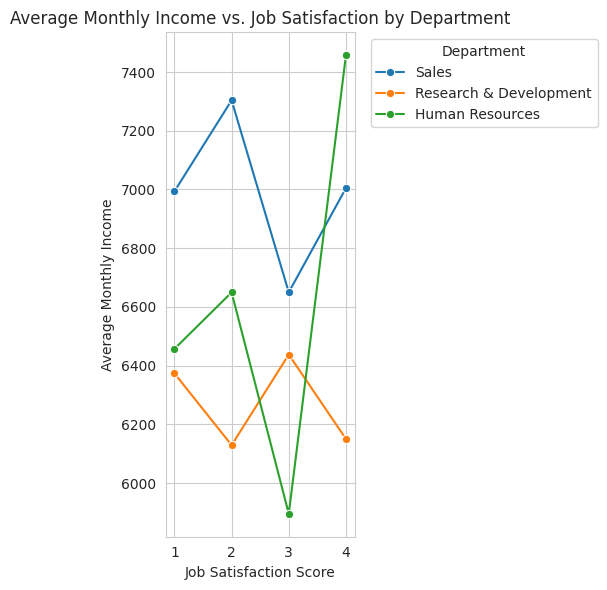

In [ ]:
# Line Plot: Average Monthly Income vs. Job Satisfaction by Department
plt.subplot(1, 3, 3)
for department in df['Department'].unique():
    department_data = df[df['Department'] == department]
    avg_income_by_satisfaction = department_data.groupby('JobSatisfaction')['MonthlyIncome'].mean().reset_index()
    sns.lineplot(x='JobSatisfaction', y='MonthlyIncome', data=avg_income_by_satisfaction, marker='o', label=department)
plt.title('Average Monthly Income vs. Job Satisfaction by Department')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Average Monthly Income')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

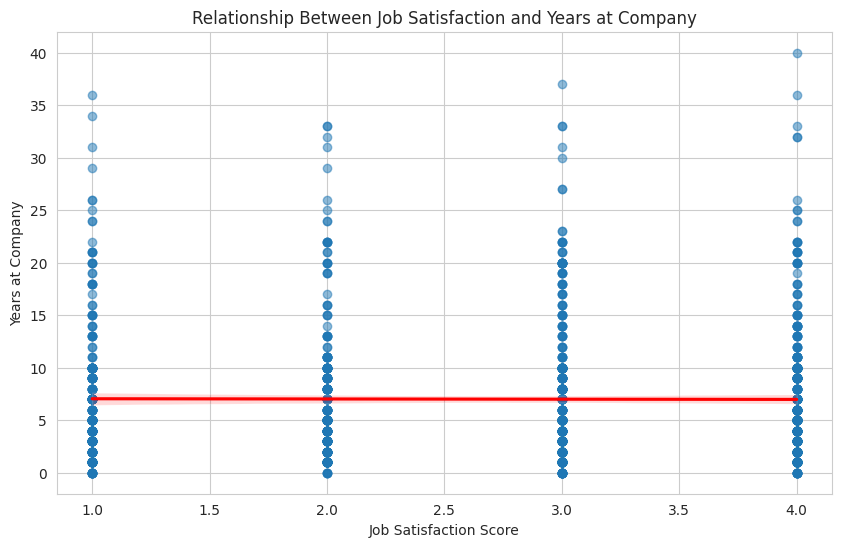

In [ ]:
# Scatter Plot with Regression Line: Job Satisfaction vs. Years at Company
plt.figure(figsize=(10, 6))
sns.regplot(x='JobSatisfaction', y='YearsAtCompany', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship Between Job Satisfaction and Years at Company')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Years at Company')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Preparing the dataset with the selected features
features = ['Age', 'TotalWorkingYears', 'JobSatisfaction', 'MonthlyIncome', 'YearsAtCompany', 'OverTime']
X = df[features]
y = df['Attrition']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True)
}

# Training and evaluating models
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

# Displaying accuracy scores
for model, acc in accuracies.items():
    print(f"{model} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.8639
Random Forest Accuracy: 0.8526
Gradient Boosting Accuracy: 0.8390
SVM Accuracy: 0.8617


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids
param_grid = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10, 100]},
    "Random Forest": {"n_estimators": [10, 50, 100], "max_depth": [None, 10, 20, 30]},
    "Gradient Boosting": {"learning_rate": [0.01, 0.1, 0.5], "n_estimators": [50, 100, 200]},
    "SVM": {"C": [0.1, 1, 10], "gamma": [1, 0.1, 0.01]}
}

# Models initialization with default parameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True)
}

# Perform GridSearchCV and store best scores
best_scores = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid=param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_scores[name] = grid_search.best_score_

# Comparing accuracies: original vs. with hyperparameter tuning
for model, acc in accuracies.items():
    print(f"{model} Original Accuracy: {acc:.4f}")
for model, acc in best_scores.items():
    print(f"{model} Tuned Accuracy: {acc:.4f}")


Logistic Regression Original Accuracy: 0.8639
Random Forest Original Accuracy: 0.8526
Gradient Boosting Original Accuracy: 0.8390
SVM Original Accuracy: 0.8617
Logistic Regression Tuned Accuracy: 0.8416
Random Forest Tuned Accuracy: 0.8435
Gradient Boosting Tuned Accuracy: 0.8436
SVM Tuned Accuracy: 0.8290


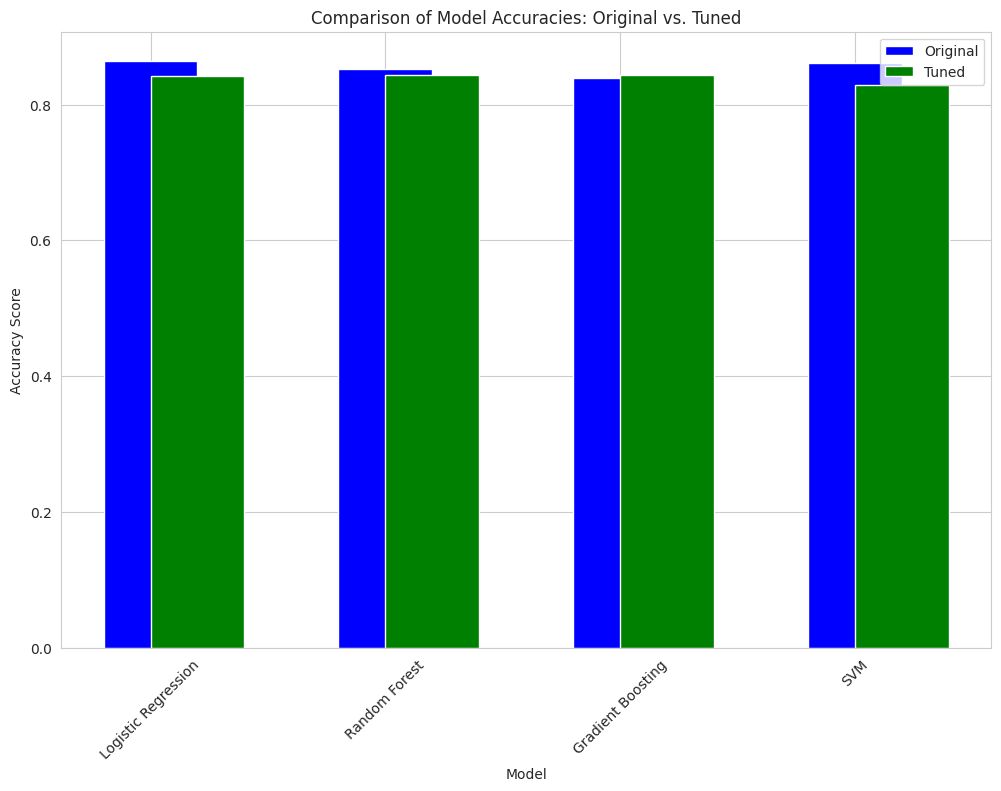

In [ ]:
# Combining original and tuned accuracies for plotting
all_scores = {model: {'Original': accuracies[model], 'Tuned': best_scores[model]} for model in models.keys()}

# Plotting
plt.figure(figsize=(12, 8))
for model, scores in all_scores.items():
    plt.bar(model, scores['Original'], color='blue', width=0.4, label='Original' if model == list(all_scores.keys())[0] else "")
    plt.bar(model, scores['Tuned'], width=0.4, color='green', align='edge', label='Tuned' if model == list(all_scores.keys())[0] else "")

plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracies: Original vs. Tuned')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

# Re-initialize models to ensure we're working with fresh instances
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True)  # Ensure SVM can provide probability estimates for ROC-AUC
}

# Fitting models and calculating metrics
evaluation_metrics = {"Accuracy": {}, "Precision": {}, "Recall": {}, "AUC-ROC": {}}

for name, model in models.items():
    # Fitting model
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculating metrics
    evaluation_metrics["Accuracy"][name] = accuracy_score(y_test, y_pred)
    evaluation_metrics["Precision"][name] = precision_score(y_test, y_pred)
    evaluation_metrics["Recall"][name] = recall_score(y_test, y_pred)
    if y_pred_proba is not None:
        evaluation_metrics["AUC-ROC"][name] = roc_auc_score(y_test, y_pred_proba)

# Display metrics
for metric in evaluation_metrics:
    print(f"{metric}:")
    for model in evaluation_metrics[metric]:
        print(f"  {model}: {evaluation_metrics[metric][model]:.4f}")
    print()

# Plotting AUC-ROC Curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        auc = roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:
  Logistic Regression: 0.8639
  Random Forest: 0.8458
  Gradient Boosting: 0.8390
  SVM: 0.8617

Precision:
  Logistic Regression: 0.6000
  Random Forest: 0.3600
  Gradient Boosting: 0.2727
  SVM: 0.0000

Recall:
  Logistic Regression: 0.0492
  Random Forest: 0.1475
  Gradient Boosting: 0.0984
  SVM: 0.0000

AUC-ROC:
  Logistic Regression: 0.7215
  Random Forest: 0.6991
  Gradient Boosting: 0.7157
  SVM: 0.4831

